This notebook contains the scripts to:
1. cluster  nodes into clusters based on temporal patterns
2. fitting nodes to sigmoid curves

Goal: characterize node timecourses and potentially express nodes as f(other nodes)

In [1]:
# RUN THIS CELL
# import packages, check folders
#%reset
from pathlib import Path
import os
import numpy as np
import h5py
import pandas as pd
#import imagesc as imagesc #pip install imagesc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
import pickle

%matplotlib inline

working_dir = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code'
#working_dir = os.getcwd()
print('current directory:\n',working_dir)
path = Path(working_dir)
parent_folder = path.parent
#print('parent folder:', parent_folder)
data_file_loc = os.path.join(parent_folder,'data') # to store data we extract later in this notebook

current directory:
 /Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code


In [29]:
s=16
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend
#import matplotlib as mpl
#mpl.rcParams['font.weight']= 'normal'



In [2]:
vidnames = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", 
            "Random mechanical", "Scaring", "SEDUCING-B", "STAR-A", 
            "SURPRISING-B", "TENNIS-A"]

In [9]:
# load each movie
fileName = os.path.join(data_file_loc,'timecourses_run_norm', f'timecourse-all-movies.npy')
print(fileName)
movieTC = np.load(fileName) # nsubs * nnodes * ntimepts *nmovies
movieTC.shape

/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/timecourses_run_norm/timecourse-all-movies.npy


(1049, 268, 32, 10)

In [8]:
movie_ind = 4

## Figures to plot all nodes' activations separately, together, or movie-wise (can skip)

In [5]:
save_yfigs = 1

time taken= 12.900667190551758


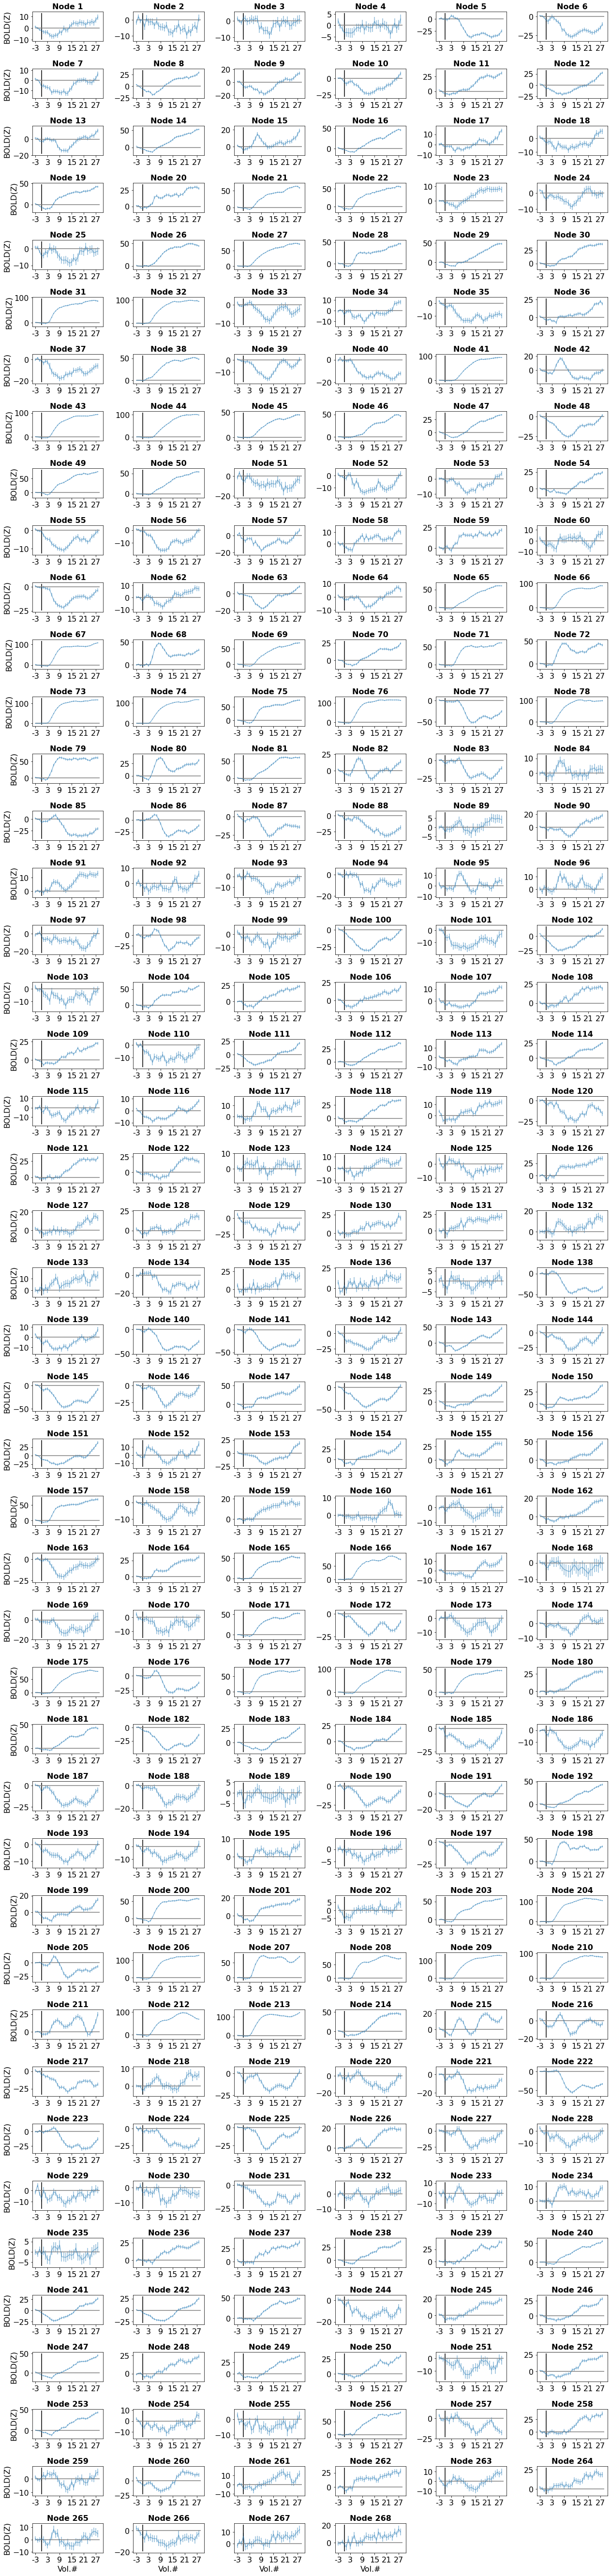

In [32]:
# To plot mean timecourse (across subs and responses for a movie) - to get an idea of response profiles per node
# Takes time to run this  - watch out!!

start_time = time.time()

ncols=6
nrows = 45
#nrows = int(np.ceil(len(sig_nodes)/ncols))

xwidth = 18
yheight = .55*nrows*xwidth/ncols
fig, ax = plt.subplots(nrows, ncols, sharex = True, sharey = False, figsize = (xwidth,yheight))
fig.set_figwidth(xwidth)
fig.set_figheight(yheight)

for n in range(268): #range(movieTC.shape[1]):
    #if n%50 == 0:
    #    print(n)
    mat = movieTC[:,n,:,movie_ind]
    
    plt.subplot(nrows,ncols,n+1)
    plt.title('Node '+ str(n+1),fontweight = 'bold')
    plt.errorbar(range(mat.shape[1]),np.nanmean(mat, axis = 0),stats.sem(mat, axis = 0,nan_policy='omit'), alpha =.5)
    if n%ncols==0:
        plt.ylabel('BOLD(Z)')
    if ((n+1)/ncols) > np.floor(268/ncols):
        plt.xlabel('Vol.#')
    ymin,ymax = plt.ylim()
    plt.vlines(3,ymin,ymax,color = 'k')
    plt.hlines(0,0,32,color ='grey')
    plt.xticks(np.arange(0,32,6),[str(i) for i in np.arange(-3,28,6)])


plt.tight_layout()
    
for n in np.arange(268,int(nrows*ncols)):
        plt.subplot(nrows,ncols,n+1)
        plt.axis('off')
print('time taken=',time.time()-start_time)
if save_yfigs:
    plt.savefig(os.path.join(data_file_loc,'figures','timecourses',f'tc_fig_movie{movie_ind}.png'))  

In [27]:
movieTC_resh = np.empty((movieTC.shape[0]*movieTC.shape[3],movieTC.shape[1],movieTC.shape[2]))

for m in range(10):
    rows = np.arange(m*movieTC.shape[0],(m+1)*movieTC.shape[0])
    #print(rows)
    movieTC_resh[rows,:,:] = movieTC[:,:,:,m]

time taken= 13.164990901947021


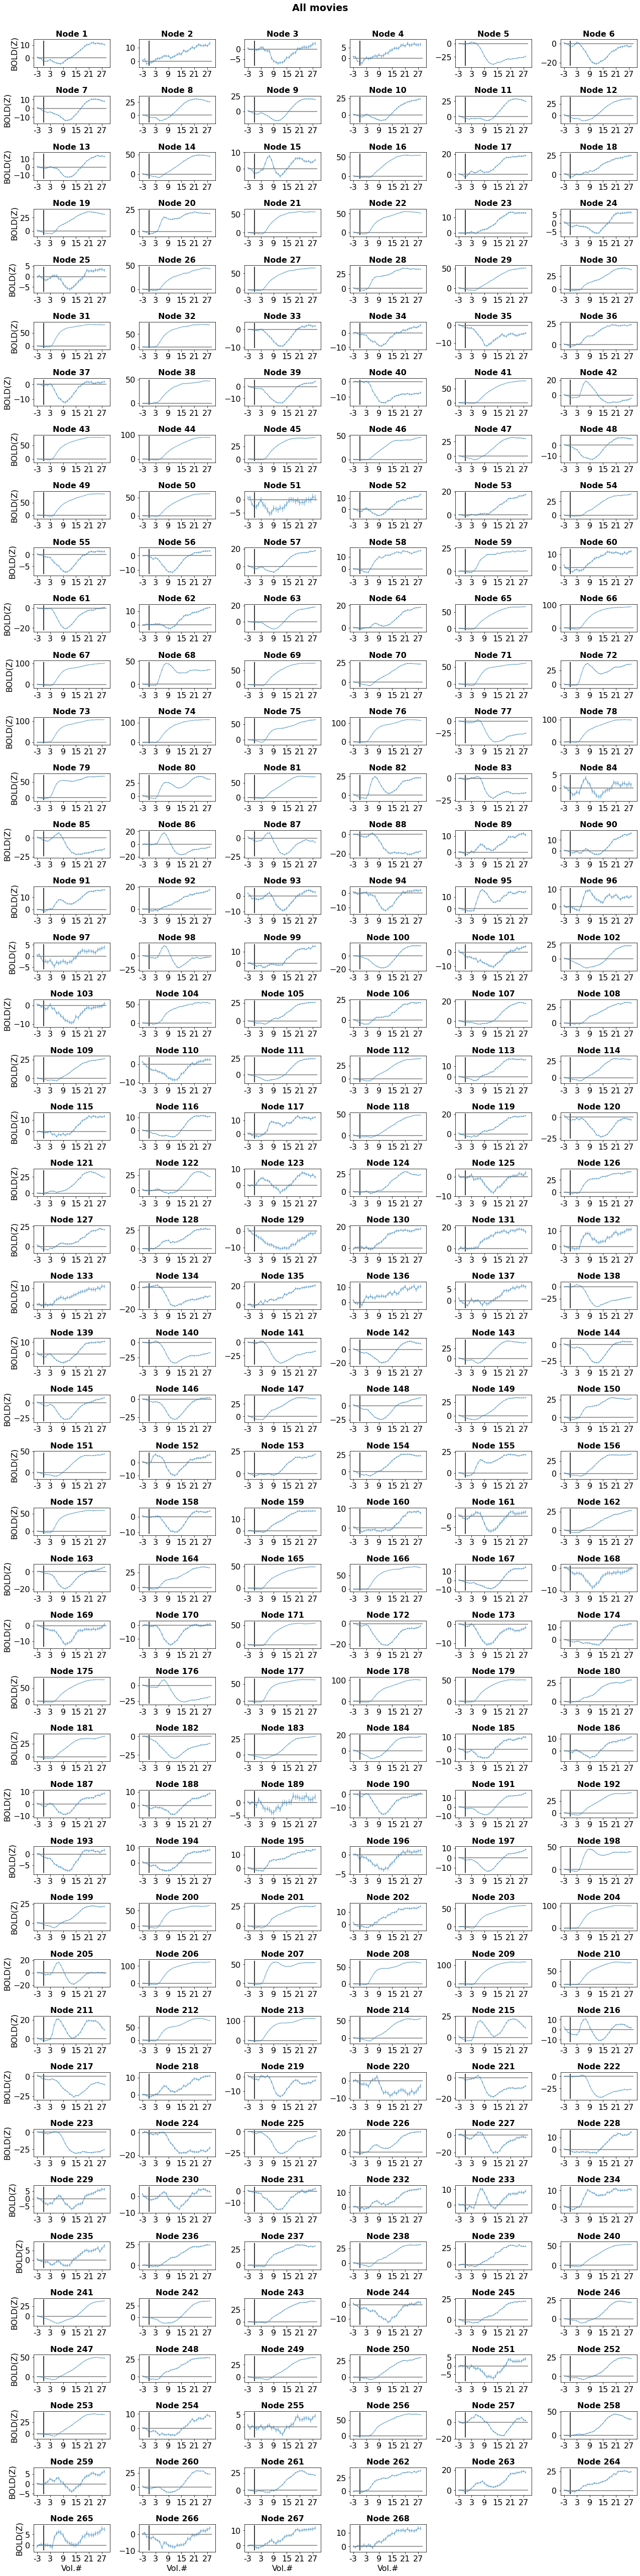

In [33]:
# plot mean timecourse per node, averaged across all movies

# To plot mean timecourse (across subs and responses for a movie) - to get an idea of response profiles per node
# Takes time to run this  - watch out!!

start_time = time.time()

ncols=6
nrows = 45
#nrows = int(np.ceil(len(sig_nodes)/ncols))

xwidth = 18
yheight = .55*nrows*xwidth/ncols
fig, ax = plt.subplots(nrows, ncols, sharex = True, sharey = False, figsize = (xwidth,yheight))
fig.set_figwidth(xwidth)
fig.set_figheight(yheight)

for n in range(268): #range(movieTC.shape[1]):
    #if n%50 == 0:
    #    print(n)
    mat = movieTC_resh[:,n,:]
    
    plt.subplot(nrows,ncols,n+1)
    plt.title('Node '+ str(n+1),fontweight = 'bold')
    plt.errorbar(range(mat.shape[1]),np.nanmean(mat, axis = 0),
                 stats.sem(mat, axis = 0,nan_policy='omit'), alpha =.5)
    if n%ncols==0:
        plt.ylabel('BOLD(Z)')
    if ((n+1)/ncols) > np.floor(268/ncols):
        plt.xlabel('Vol.#')
    ymin,ymax = plt.ylim()
    plt.vlines(3,ymin,ymax,color = 'k')
    plt.hlines(0,0,32,color ='grey')
    plt.xticks(np.arange(0,32,6),[str(i) for i in np.arange(-3,28,6)])

for n in np.arange(268,int(nrows*ncols)):
        plt.subplot(nrows,ncols,n+1)
        plt.axis('off')
print('time taken=',time.time()-start_time)

plt.suptitle('All movies',fontweight='bold')
fig.tight_layout(rect=[0, 0.02, 1, 0.98])
        
if save_yfigs:
    plt.savefig(os.path.join(data_file_loc,'figures','timecourses',f'tc_fig_allMovies.png'))  

## Perform k-means clustering on the nodes averaged across subjects to identify curve patterns - run cells 1 and 2

In [34]:
# RUN THIS CELL
#import sklearn
from sklearn.cluster import KMeans

In [35]:
# RUN THIS CELL
def get_training_instances_matrix(movie_ind):
    X = np.mean(movieTC[:,:,:,movie_ind], axis = 0) #nodes, timepts
    return X

(268, 32)

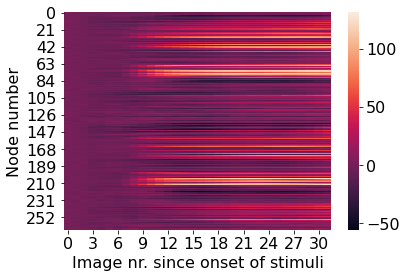

In [36]:
movie_ind = 4
X = get_training_instances_matrix(movie_ind)
sns.heatmap(X)
plt.xlabel('Image nr. since onset of stimuli')
plt.ylabel('Node number')
X.shape

### 1.Group-level silhouette analysis

In this section I tried to determine the optimal number of clusters of timecourses - the ultimate goal being to understand the hidden timecourse structures. Code from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Used the kmeans clustering algorithm on a single movie (usually random mechanical  Used this as an exemplar for most of these analyses since this was the most ambiguously perceived (relevant for future yes vs. no analyses). But it's possible one of the less ambiguous nodes could have cleaner clusters - either way, end goal was not perfect clusters but the underlying temporal structures of nodes to be used as a reference for future analyses.

In [37]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.6544141170224583
For n_clusters = 3 The average silhouette_score is : 0.4801622053302115
For n_clusters = 4 The average silhouette_score is : 0.42581637453923504
For n_clusters = 5 The average silhouette_score is : 0.40026661669001545
For n_clusters = 6 The average silhouette_score is : 0.38706845278114776
For n_clusters = 7 The average silhouette_score is : 0.36503621188364754
For n_clusters = 8 The average silhouette_score is : 0.3385911769422011
For n_clusters = 9 The average silhouette_score is : 0.3228447444975786
For n_clusters = 10 The average silhouette_score is : 0.2947059380638217


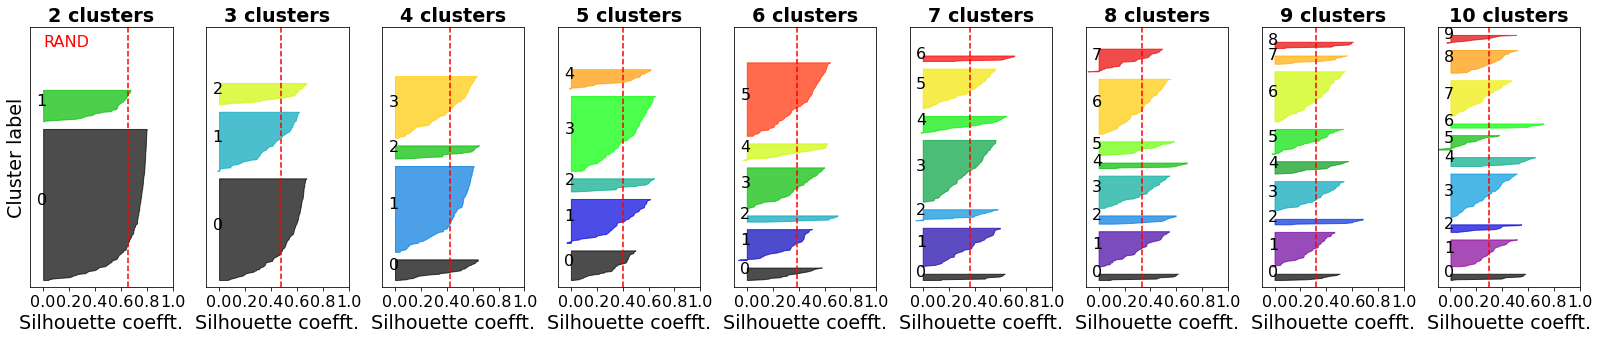

In [38]:
# Plotting silhouette plots different numbers of clusters (see next line)

movie_ind =4 # video: random mechanical.
range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]
ncols = len(range_n_clusters)
nrows = 1
yheight = 5
xwidth = yheight/2*ncols
fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize = (xwidth,yheight))
#fig.set_figwidth(xwidth)
#fig.set_figheight(yheight)
        
silhouette_avg_array = []
for col,n_clusters in enumerate(range_n_clusters):
    # Create a subplot with 1 row and 2 columns
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax[col].set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    
    X = get_training_instances_matrix(movie_ind)
    ax[col].set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    clus_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, clus_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_avg_array.append([n_clusters,silhouette_avg])
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, clus_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[clus_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax[col].fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax[col].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    #if n_clusters==range_n_clusters[0]:
    #    ax1.set_title("The silhouette plot for the \nvarious clusters.", fontsize = 'large')

    ax[col].set_xlabel("Silhouette coefft.", fontsize = 'large')
    ax[col].set_title(str(n_clusters)+ " clusters", fontsize = 'large', fontweight = 'bold')
    
    if col == 0:
        ax[col].set_ylabel("Cluster label", fontsize = 'large')
        ax[col].text(0, 350,str.upper(vidnames[movie_ind])[:4], fontsize=16, color = 'red')
    

    # The vertical line for average silhouette score of all the values
    ax[col].axvline(x=silhouette_avg, color="red", linestyle="--")

    ax[col].set_yticks([])  # Clear the yaxis labels / ticks
    ax[col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

plt.tight_layout()
#plt.show()

(0.0, 1.0)

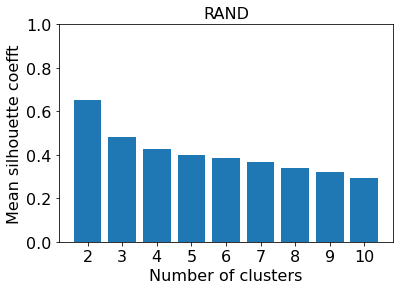

In [39]:
plt.bar(np.array(silhouette_avg_array)[:,0],np.array(silhouette_avg_array)[:,1])
plt.xlabel('Number of clusters')
plt.ylabel('Mean silhouette coefft')
plt.xticks(np.array(silhouette_avg_array)[:,0])
plt.title(str.upper(vidnames[movie_ind])[:4])
plt.ylim(0,1)

### 2.Subjectwise silhouette analysis

After the silhouette analysis on the mean data (to determine the optimal #clusters, I did the same for each subject as a sanity check. In general, cluster 2 had the highest score (i.e., that it is best), but visually you can see that it has one meaningful cluster and one "dump". 3 or 4 clusters made more sense (higher nos. too perhaps, but here we didn't probe it much higher, since we just wanted to get some possible cluster shapes). Using another clustering algorithm could work too if this analysis is to be used to actually divide nodes based on clusters.

In [41]:
def get_training_instances_matrix_subjectwise(movieTC,subj):
    X = movieTC[subj,:,:,movie_ind]
    return X

#subjectwise silhouette analysis
start_time = time.time()
nsub = movieTC.shape[0]
range_n_clusters = [2, 3, 4, 5, 6,7, 8, 9, 10]
silhouetteavg_per_sub_cluster = np.zeros((nsub,max(range_n_clusters)+1))
for n_clusters in range_n_clusters:
    print(str(n_clusters) + 'clusters.' + str(time.time()-start_time) + 'secs have elapsed.')
    for sub in range(nsub):
        X = get_training_instances_matrix_subjectwise(movieTC,sub)
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        clus_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, clus_labels)
        #print("For n_clusters =", n_clusters,
        #      "The average silhouette_score is :", silhouette_avg)
        silhouetteavg_per_sub_cluster[sub,n_clusters]=silhouette_avg
        
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, clus_labels)

2clusters.0.00021791458129882812secs have elapsed.
3clusters.31.486521244049072secs have elapsed.


/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


4clusters.64.20608687400818secs have elapsed.


/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


5clusters.101.18327212333679secs have elapsed.


/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


6clusters.141.0881130695343secs have elapsed.


/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


7clusters.186.45219898223877secs have elapsed.


/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


8clusters.234.76393508911133secs have elapsed.


/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


9clusters.287.8840022087097secs have elapsed.


/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


10clusters.340.2546260356903secs have elapsed.


/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


In [43]:
silhouetteavg_per_sub_cluster

array([[0.        , 0.        , 0.23533765, ..., 0.12055726, 0.09560928,
        0.11085648],
       [0.        , 0.        , 0.18469276, ..., 0.08787507, 0.07142429,
        0.07771771],
       [0.        , 0.        , 0.25681029, ..., 0.07372095, 0.08433581,
        0.07070049],
       ...,
       [0.        , 0.        , 0.99626866, ..., 0.99626866, 0.99626866,
        0.99626866],
       [0.        , 0.        , 0.99626866, ..., 0.99626866, 0.99626866,
        0.99626866],
       [0.        , 0.        , 0.99626866, ..., 0.99626866, 0.99626866,
        0.99626866]])

(1049, 11)
0.10086049316821569


Text(28.0, 0.5, 'Mean silhouette coefficients')

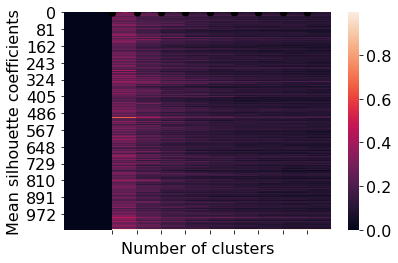

In [42]:
print(silhouetteavg_per_sub_cluster.shape)
sns.heatmap(silhouetteavg_per_sub_cluster)
print(np.mean(silhouetteavg_per_sub_cluster[:,-1]))

#plt.errorbar(np.arange(2,11),np.mean(silhouetteavg_per_sub_cluster[:,2:],axis=0),
#             stats.sem(silhouetteavg_per_sub_cluster[:,2:],axis=0),ls = 'None', marker = '.', color = 'k')

for sub in range(silhouetteavg_per_sub_cluster[:,2:].shape[0]):
    plt.plot(np.arange(2,11),silhouetteavg_per_sub_cluster[sub,2:],ls = 'None', marker = 'o', color = 'k', alpha = .05)
plt.bar(np.arange(2,11),np.mean(silhouetteavg_per_sub_cluster[:,2:],axis=0), alpha = .3, edgecolor = 'k')
plt.xticks(np.arange(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Mean silhouette coefficients')

### 3.Create and plot clusters

This section is to generate clusters by k-means clustering (same as used for silhouette analyses above) and to plot the node timecourses(averaged across all subs) within each cluster. 
Sanity checks: 
1. barplots of the estimates from the slope GLM fits (from the GLMs implemented in the notebook: fMRI_GLM_firstlevel.ipynb). Mean slopes should roughly correspond to our cluster timecourse shapes
2. cross-correlation between nodes. Ideally we'd expect nodes within the same cluster/similar clusters to correlate more and see about x blobs for x clusters.

In [44]:
# RUN THIS CELL
def cluster_node_timecourses(X,nclusters,print_results):
    kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(X)
    if print_results:
        print('\nlabels:' + str(kmeans.labels_) + ', length:' + str(len(kmeans.labels_)))
        for i in range(nclusters):
            print('\ncluster',i,'=',len(np.where(kmeans.labels_==i)[0]))
    return kmeans.labels_

In [45]:
movie_ind = 4
X = get_training_instances_matrix(movie_ind)
nclusters = 3
labels = cluster_node_timecourses(X,nclusters,0)

In [67]:
# RUN THIS CELL
def plot_timecourses(labels,tc,movie_ind):
    print('movie:'+ vidnames[movie_ind])
    unique_clusters = np.unique(labels)
    nclusters = len(unique_clusters)
    
    #plt.figure(1, figsize = (5*nclusters,5))
    plt.figure(1, figsize = (5*nclusters,10))
    plt.suptitle(vidnames[movie_ind],fontweight = 'bold', fontsize = 12)
    
    if nclusters <= 3:
        nrows = 1
    else:
        nrows = np.ceil(nclusters/3)
    ncols = 3
    nodes_cluster= []
    nodes_cluster_cum= []
    for c in unique_clusters:
        
        plt.subplot(2,nclusters,c+1)
        nodes = np.where(labels==c)[0]
        ind = -1

        for n in nodes:
            ind += 1
            row = int(np.floor(ind/ncols))
            col = int(np.floor(ind%ncols))
            mat = tc[:,n,:]#sub*timepts
            #print(mat.shape)
            
            plt.errorbar(range(mat.shape[1]),np.nanmean(mat, axis = 0),
                         stats.sem(mat, axis = 0,nan_policy='omit'), label = "Node" + str(n+1))
        plt.title('cluster '+str(c) +', ' + str(ind) + 'nodes')
        print(str(ind)+'nodes')
        nodes_cluster.append(ind)
        nodes_cluster_cum.append(np.sum(nodes_cluster))
    plt.tight_layout()
    
       
    #plt.figure(3,figsize = (5,5))
    plt.subplot(2,2,3)
        
    nodes = list(range(268))
    nodes_sorted = [x for _,x in sorted(zip(labels,nodes))]
    meanTimecourse = np.mean(tc,axis = 0) # nodes, timepts
    mat0 = np.zeros((len(nodes),len(nodes)))
    mat = np.zeros((len(nodes),len(nodes)))
    for i1,n1 in enumerate(nodes_sorted): #range(movieTC.shape[1]):
        for i2,n2 in enumerate(nodes_sorted):
            mat[i1,i2],p = stats.pearsonr(meanTimecourse[n1,:],meanTimecourse[n2,:])
            #mat0[i1,i2],p = stats.spearmanr(meanTimecourse[n1,:31],meanTimecourse[n2,:31])
    sns.heatmap(mat, cmap = 'RdBu_r', center =0, alpha =.3,square = True)
    #sns.heatmap(mat, alpha =0.3)
    plt.hlines(nodes_cluster_cum,0,268, color = 'k', ls = 'solid')
    plt.vlines(nodes_cluster_cum,0,268, color = 'k', ls = 'solid')
    plt.xlabel('nodes_sorted')
    plt.ylabel('nodes_sorted')
    plt.title('Pearson correlation')
    
    plt.tight_layout()
    

### 3.1. Exploring different numbers of clusters for RANDOM MECH

In most of the single-movie analyses I've used the stimulus 'random mechanical' as the exemplar since it appears to have been perceived the most ambiguously.

Movie: Random mechanical
movie:Random mechanical
220nodes
46nodes


TypeError: No loop matching the specified signature and casting was found for ufunc add

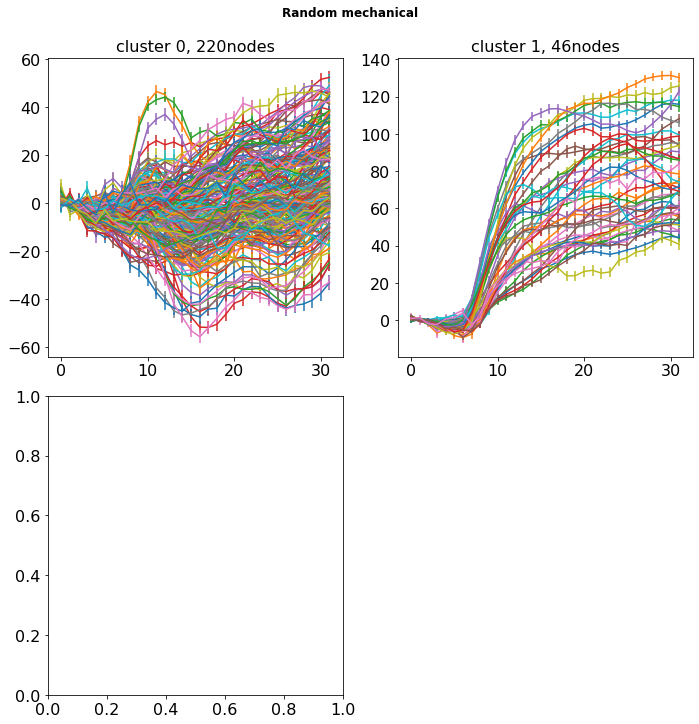

In [61]:
movie_ind = 4# CHANGE THIS TO THE DESIRED MOVIE IND HERE
print('Movie:',vidnames[movie_ind])
X = get_training_instances_matrix(movie_ind)
nclusters = 2 # CHANGE THIS TO THE NUMBER OF DESIRED CLUSTERS
labels = cluster_node_timecourses(X,nclusters,0)
plot_timecourses(labels,movieTC[:,:,:,movie_ind], movie_ind)

Movie: Random mechanical
movie:Random mechanical
86nodes
148nodes
31nodes


<ipython-input-67-250d693eb1f1>:60: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


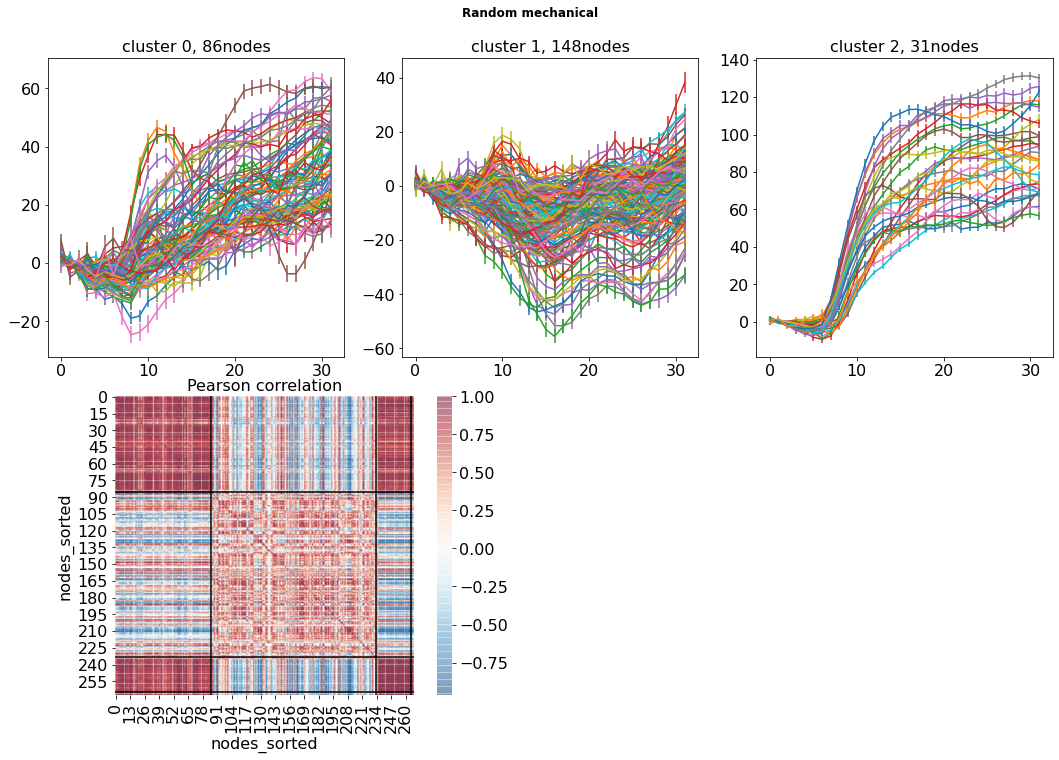

In [68]:
movie_ind = 4# CHANGE THIS TO THE DESIRED MOVIE IND HERE
print('Movie:',vidnames[movie_ind])
X = get_training_instances_matrix(movie_ind)
nclusters = 3 # CHANGE THIS TO THE NUMBER OF DESIRED CLUSTERS
labels = cluster_node_timecourses(X,nclusters,0)
plot_timecourses(labels,movieTC[:,:,:,movie_ind], movie_ind)

Movie: Random mechanical
movie:Random mechanical
125nodes
30nodes
90nodes
19nodes


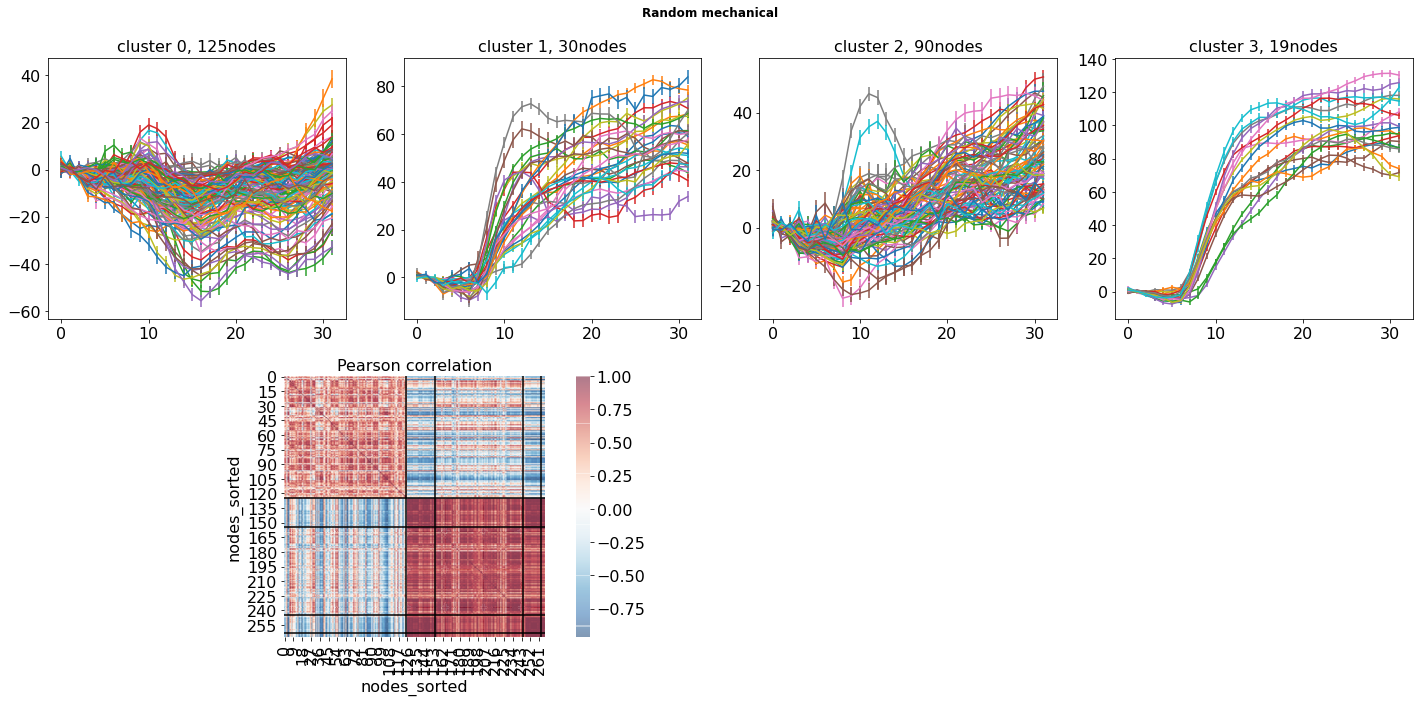

In [69]:
movie_ind = 4# CHANGE THIS TO THE DESIRED MOVIE IND HERE
print('Movie:',vidnames[movie_ind])
X = get_training_instances_matrix(movie_ind)
nclusters = 4 # CHANGE THIS TO THE NUMBER OF DESIRED CLUSTERS
labels = cluster_node_timecourses(X,nclusters,0)
plot_timecourses(labels,movieTC[:,:,:,movie_ind], movie_ind)

Movie: Random mechanical
movie:Random mechanical
62nodes
112nodes
18nodes
45nodes
26nodes


<ipython-input-67-250d693eb1f1>:60: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


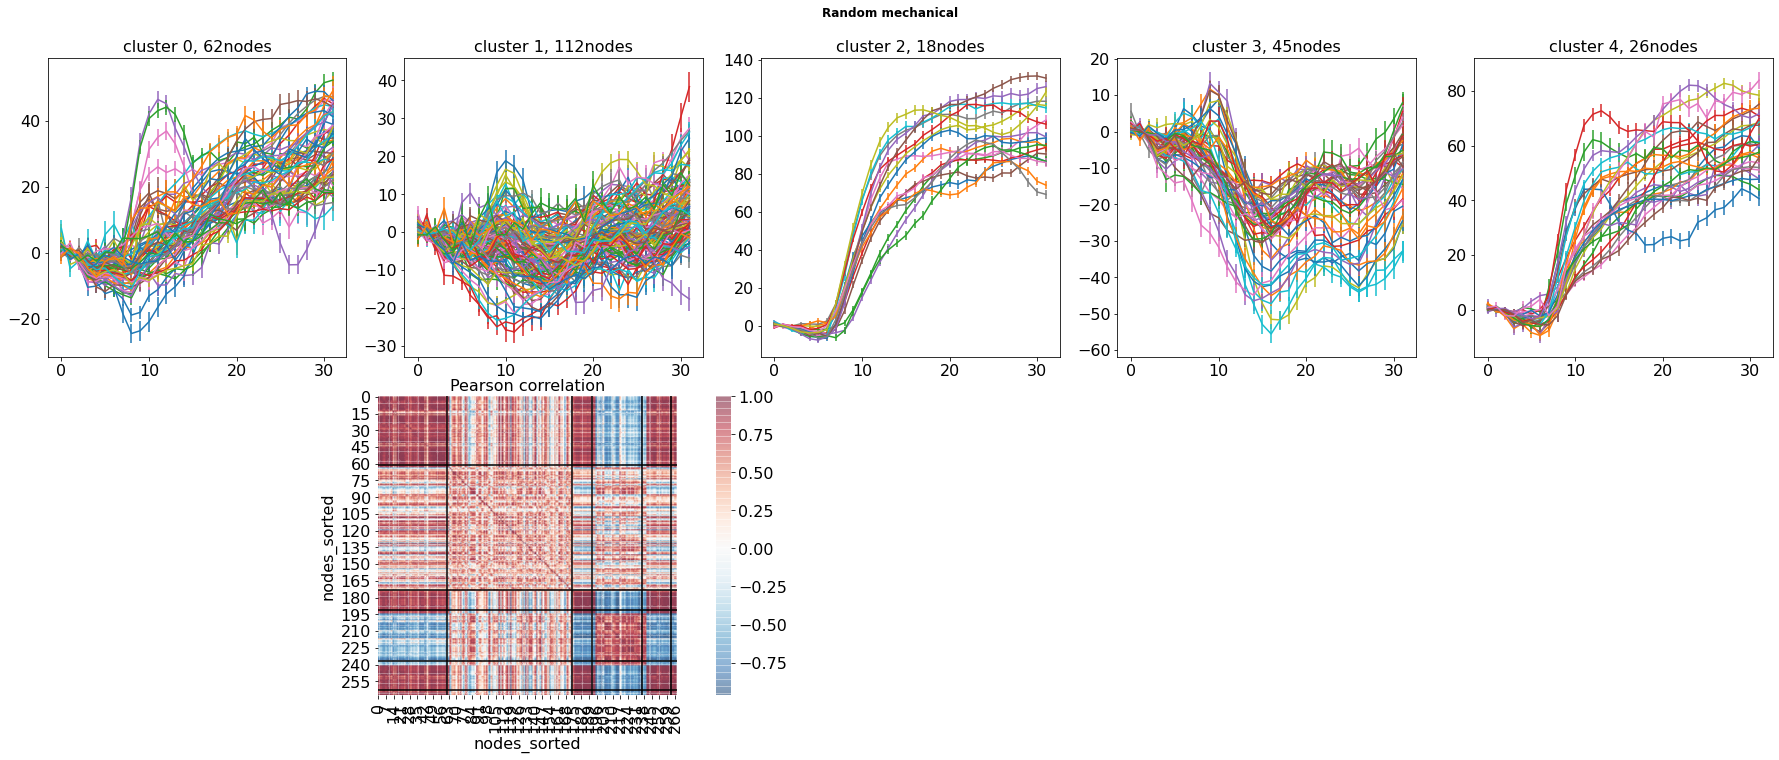

In [70]:
movie_ind = 4 # CHANGE THIS TO THE DESIRED MOVIE IND HERE
print('Movie:',vidnames[movie_ind])
X = get_training_instances_matrix(movie_ind)
nclusters = 5 # CHANGE THIS TO THE NUMBER OF DESIRED CLUSTERS
labels = cluster_node_timecourses(X,nclusters,0)
plot_timecourses(labels,movieTC[:,:,:,movie_ind], movie_ind)

Movie: Random mechanical
movie:Random mechanical
50nodes
12nodes
28nodes
9nodes
11nodes
42nodes
6nodes
50nodes
18nodes
32nodes


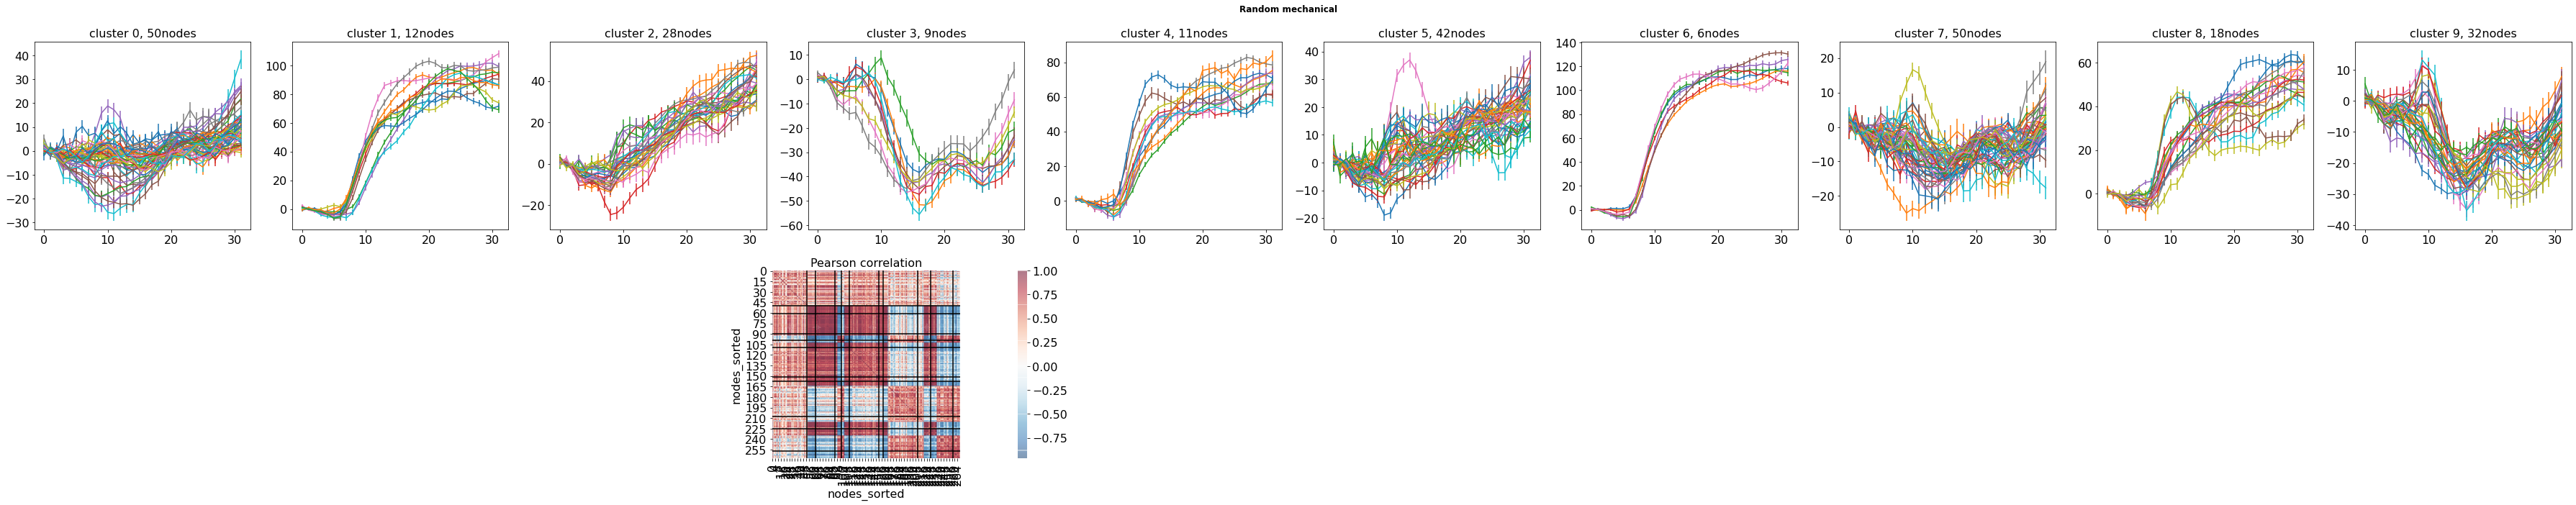

In [71]:
movie_ind = 4 # CHANGE THIS TO THE DESIRED MOVIE IND HERE
print('Movie:',vidnames[movie_ind])
X = get_training_instances_matrix(movie_ind)
nclusters = 10 # CHANGE THIS TO THE NUMBER OF DESIRED CLUSTERS
labels = cluster_node_timecourses(X,nclusters,0)
plot_timecourses(labels,movieTC[:,:,:,movie_ind], movie_ind)

#### 3.2 Plotting response-based curves - run first cell

For each cluster, plotting means across all subs, yes/no subs and a difference. Didn't do any further analyses on this since the clustering itself was imperfect.

In [72]:
# RUN THIS CELL
#load behavioral responses
responses_slopereg = np.load(os.path.join(data_file_loc,'responses.npy'))
responses_slopereg.shape

# get yes/no indices
resp_yes = responses_slopereg[:,movie_ind] == 1
resp_no = responses_slopereg[:,movie_ind] == 0
resp_unsure = responses_slopereg[:,movie_ind] == 9
resp_any = (responses_slopereg[:,movie_ind] == 0)| (responses_slopereg[:,movie_ind] == 1) | (responses_slopereg[:,movie_ind] == 9)

# mean timecourses across yes/no responders for a certain movie (defined in the previous node)
meanTimecourse_anyresp = np.mean(movieTC[resp_any,:,:],axis = 0) # nodes, timepts
meanTimecourse_yes = np.mean(movieTC[resp_yes,:,:],axis = 0) # nodes, timepts
meanTimecourse_no = np.mean(movieTC[resp_no,:,:],axis = 0) # nodes, timepts
meanTimecourse_unsure= np.mean(movieTC[resp_unsure,:,:],axis = 0) # nodes, timepts

In [75]:

# to save mean timecourses for each cluster, and for yes/no responses
nclusters = 4 # CHANGE THIS TO THE NUMBER OF DESIRED CLUSTERS
    
for movie_ind in range(10):
    #movie_ind = 4# CHANGE THIS TO THE DESIRED MOVIE IND HERE
    print('Movie:',vidnames[movie_ind])
    
    X = get_training_instances_matrix(movie_ind)
    labels = cluster_node_timecourses(X,nclusters,0)

    plt.figure(movie_ind+1,figsize = (10,8))
    plt.suptitle(vidnames[movie_ind], fontsize=12, fontweight = 'bold')
    
    # get yes/no indices
    resp_yes = responses_slopereg[:,movie_ind] == 1
    resp_no = responses_slopereg[:,movie_ind] == 0
    resp_unsure = responses_slopereg[:,movie_ind] == 9
    resp_any = (responses_slopereg[:,movie_ind] != -1) #| (responses_slopereg[:,movie_ind] == 1) | (responses_slopereg[:,movie_ind] == 9)

    # mean timecourses across yes/no responders for a certain movie (defined in the previous node)
    meanTimecourse_anyresp = np.mean(movieTC[resp_any,:,:,movie_ind]   ,axis = 0) # nodes, timepts
    meanTimecourse_yes     = np.mean(movieTC[resp_yes,:,:,movie_ind]   ,axis = 0) # nodes, timepts
    meanTimecourse_no      = np.mean(movieTC[resp_no,:,:,movie_ind]    ,axis = 0) # nodes, timepts
    meanTimecourse_unsure  = np.mean(movieTC[resp_unsure,:,:,movie_ind],axis = 0) # nodes, timepts
    
    nyes = len(np.where(resp_yes)[0])
    nno = len(np.where(resp_no)[0])
    nunsure = len(np.where(resp_unsure)[0])
    nall = nyes+nno+nunsure

    for clus in range(len(np.unique(labels))):
        #del meanTimecourse
        nodes_subset = list(np.where(labels==clus)[0])
        
        nt = meanTimecourse_anyresp.shape[1]
        tscore,pval = np.zeros((nt,)),np.zeros((nt,))#ntimepts,ntimepts
        for i in np.arange(1,meanTimecourse_yes.shape[1]):
            tscore[i], pval[i] = stats.ttest_ind(meanTimecourse_yes[nodes_subset,i],meanTimecourse_no[nodes_subset,i])


        plt.subplot(3,len(np.unique(labels)) , clus+1)
        plt.title('cluster' + str(clus) + ',nodes=' + str(len(nodes_subset)))
        plt.errorbar(range(nt), np.mean(meanTimecourse_anyresp[nodes_subset,:],axis=0), 
                     stats.sem(meanTimecourse_anyresp[nodes_subset,:],axis=0), 
                     color = 'k', label = 'AnyResp,n='+ str(nall))
        #plt.vlines(np.where(pval<.05)[0],-.1,.5, alpha =.1,label = 'p<.05')
        plt.hlines(0,0,28,alpha = .4, color = 'grey', ls = 'dotted')

        if clus == 0:
            plt.legend()
            plt.ylabel('Mean activity across nodes')

        plt.subplot(3, len(np.unique(labels)), len(np.unique(labels))+clus+1)
        plt.title('cluster' + str(clus) + ',n=' + str(len(nodes_subset)))
        plt.errorbar(range(meanTimecourse_yes[nodes_subset,:].shape[1]), np.mean(meanTimecourse_yes[nodes_subset,:],axis=0), 
                     stats.sem(meanTimecourse_yes[nodes_subset,:],axis=0), color = 'r', label = 'Yes,n='+str(nyes))
        plt.errorbar(range(meanTimecourse_no[nodes_subset,:].shape[1]), np.mean(meanTimecourse_no[nodes_subset,:],axis=0), 
                     stats.sem(meanTimecourse_no[nodes_subset,:],axis=0), color = 'b', label = 'No,n='+str(nno))
        plt.errorbar(range(meanTimecourse_unsure[nodes_subset,:].shape[1]), np.mean(meanTimecourse_unsure[nodes_subset,:],axis=0), 
                     stats.sem(meanTimecourse_unsure[nodes_subset,:],axis=0), color = 'g', label = 'Unsure,n='+str(nunsure))
        plt.vlines(np.where(pval<.05)[0],-.1,.5, alpha =.1)#,label = 'p<.05')
        plt.hlines(0,0,28,alpha = .4, color = 'grey', ls = 'dotted')
        #plt.xlabel('Image Nr.')
        if clus == 0:
            plt.ylabel('Mean activity across nodes')
            plt.legend()

        #print(len(range(meanTimecourse_yes.shape[1]))
        plt.subplot(3, len(np.unique(labels)), 2*len(np.unique(labels))+clus+1)
        plt.title('cluster' + str(clus) + ',n=' + str(len(nodes_subset)))
        plt.plot(range(meanTimecourse_yes.shape[1]), tscore, color = 'k')
        plt.vlines(np.where(pval<.05)[0],-6,6, alpha =.1,label = 'p<.05')
        plt.hlines(0,0,32,alpha = .4, color = 'grey', ls = 'dotted')

        plt.xlabel('Image Nr.')
        #ax[2,1].set_xlim(0,28)
        #ax[2,1].set_ylim(-3,3)
        if clus == 0:
            plt.ylabel('T-score yes-no')
            plt.legend()

    plt.tight_layout()

    plt.savefig(os.path.join(data_file_loc,'figures',f'meantc_{nclusters}clus_{movie_ind}{str.upper(vidnames[movie_ind][:4])}.png'))  
    plt.close()
    

Movie: COAXING-B
Movie: BILLIARD-A
Movie: DRIFTING-A
Movie: Fishing
Movie: Random mechanical
Movie: Scaring
Movie: SEDUCING-B
Movie: STAR-A
Movie: SURPRISING-B
Movie: TENNIS-A


### Curve-fitting of nodes

In this section, I explore which curves can best explain the temporal changes of nodes - especially those that show sigmoid shapes, such as cluster 1 in the 3- and 4-cluster conditions show in the figures above. Since cluster 0 in both cases also show a linear trend (special case of sigmoid), I try to fit both clusters with the same function. First I explore two functions' parameters below:
1. sigmoid: y = a / (1. + np.exp(-c * (x - d))) + b
2. logistic_regression: y= A*(1 - (1/ (1+np.exp((x-c)/s)) ))

I also use the lmfit package to fit the curves since it is robust and offers options to initialise, set bounds etc.

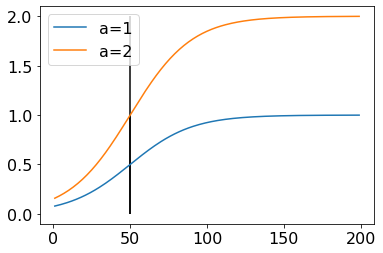

In [77]:
# sigmoid curve properties of parameters
# can explore the effect of a,b,c,d here

def sigmoid(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

x= np.arange(1,200)
a= 1#range
b=0 #y0
c=.05#variance
d=50#centre
plt.plot(x,sigmoid(x, a, b, c, d), label='a='+str(a))
plt.vlines(d,b,b+a,'k')
a *= 2
plt.plot(x,sigmoid(x, a, b, c, d), label='a='+str(a))
plt.vlines(d,b,b+a,'k')

plt.legend()

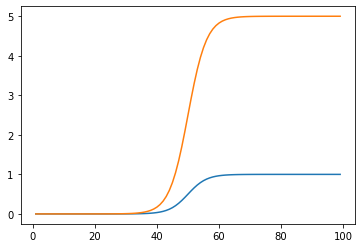

In [19]:
# RUN THIS CELL
# logistic curve properties
# can explore the effect of A,c,s here

def logistic_function(x, A, c, s):
    return A*(1 - (1/ (1+np.exp((x-c)/s)) ))


x= np.arange(1,100)
A= 1#amplitude
c=x[int(len(x)/2)]#centre
s=3#standard dev
plt.plot(x,logistic_function(x, A, c, s))
A = 5
plt.plot(x,logistic_function(x, A, c, s))

##  Curve fitting with lmfit (only the first part which I stopped midway. Main analysis in Characterize_timecourses_functionfits.ipynb

This is the beginning of some curve-fitting I tried to understand the temporal structure within clusters. Fitted nodes within each cluster to the approximate function it likely fit, and compared parameters between yes and no within those clusters. Also tried to fit the same logistic function to both sigmoid and linear (a specific case of sigmoid) clusters. In the end, dropped this one too since clusters are imperfect. 

Instead of defining node functions based on which cluster it belonged to, I now tried various functions for each node and thresholded based on the Rsq and AIC. These were done in Characterize_timecourses_functionfits.ipynb

In [20]:
# RUN THIS CELL
#from lmfit.models import StepModel, RectangleModel, LinearModel
from lmfit import Model

Let's use the 4-cluster models here on. Starting with a list of clusterlabels and function types from eyeballing.
Linear and nonlinear cluster numbers for various movies(since it looks like they all might have similar clusters)
Each row: **moviename**ClusterType1**ClusterLabel,**ClusterType2**ClusterLabel**,ClusterType3**ClusterLabel**...

1. Random mech: Linear: 0, Sigmoid: 1, Sinusoidal:3 , dump:2
2. Fishing:     Linear: 0, Sigmoid: 2, Sinusoidal:1 , dump:-
3. Drifting:    Linear: 2, Sigmoid: 1, Sinusoidal:0 , dump:0

In [173]:
# log cluster ift
def logfit(movie_ind,curveType):
    
    X,movieTC = get_training_instances_matrix(movie_ind)
    
    # get yes/no indices
    resp_yes = responses_slopereg[:,movie_ind] == 1
    resp_no = responses_slopereg[:,movie_ind] == 0
    resp_unsure = responses_slopereg[:,movie_ind] == 9
    resp_any = (responses_slopereg[:,movie_ind] == 0)| (responses_slopereg[:,movie_ind] == 1) | (responses_slopereg[:,movie_ind] == 9)

    # mean timecourses across yes/no responders for a certain movie (defined in the previous node)
    meanTimecourse_anyresp = np.mean(movieTC[resp_any,:,:],axis = 0) # nodes, timepts
    meanTimecourse_yes = np.mean(movieTC[resp_yes,:,:],axis = 0) # nodes, timepts
    meanTimecourse_no = np.mean(movieTC[resp_no,:,:],axis = 0) # nodes, timepts
    meanTimecourse_unsure= np.mean(movieTC[resp_unsure,:,:],axis = 0) # nodes, timepts
    #tc_yes_or_no = movieTC[resp_yes_or_no,:,:]
        
    nyes = len(np.where(resp_yes)[0])
    nno = len(np.where(resp_no)[0])
    nunsure = len(np.where(resp_unsure)[0])
    nall = nyes+nno+nunsure
    
    print('Movie: ', vidnames[movie_ind],'.')

    titles = ['A:amplitude', 'c:center', 's:sigma']

    #fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (20,15))
    params_yes     = np.zeros((268,len(titles)))
    params_no      = np.zeros_like(params_yes)
    params_unsure  = np.zeros_like(params_yes)
    params_anyresp = np.zeros_like(params_yes)

    unfit = 0
    for node in range(268): # i=rownum, node= actual node nr

        yyes = meanTimecourse_yes[node,:]
        yno = meanTimecourse_no[node,:]
        yunsure = meanTimecourse_unsure[node,:]
        yanyresp = meanTimecourse_anyresp[node,:]
        nt = len(yyes)
        x = np.arange(nt)
        
        try:
            #form = 'logistic'
            #model = StepModel(form=form) + LinearModel()
            model = Model(logistic_function)#,nan_policy = 'omit') # solve this error, add hints etc. in model fits
            model.set_param_hint('A', min=0, max = 2)
            model.set_param_hint('c', min=2, max = 25)
            model.set_param_hint('s', min=1e-10, max = 500)

            params = model.make_params(c=np.argmax(np.diff(yyes)), A = max(yyes)-min(yyes), s = 1)
            result = model.fit(yyes, params, x=x)
            params_yes[i,:] = np.array([result.best_values['A'], result.best_values['c'], result.best_values['s']])

            params = model.make_params(c=np.argmax(np.diff(yno)), A = max(yno)-min(yno), s = 1)
            result = model.fit(yno, params, x=x)
            params_no[i,:] = np.array([result.best_values['A'], result.best_values['c'], result.best_values['s']])

            params = model.make_params(c=np.argmax(np.diff(yunsure)), A = max(yunsure)-min(yunsure), s = 1)
            result = model.fit(yunsure, params, x=x)
            params_unsure[i,:] = np.array([result.best_values['A'], result.best_values['c'], result.best_values['s']])

            params = model.make_params(c=np.argmax(np.diff(yanyresp)), A = max(yanyresp)-min(yanyresp), s = 1)
            result = model.fit(yanyresp, params, x=x)
            params_anyresp[i,:] = np.array([result.best_values['A'], result.best_values['c'], result.best_values['s']])

        except:
            #print("does not fit")
            unfit += 1

    print(unfit,'out of ',i,'nodes were not fit.')
        

    nrows = 4
    ncols = 3
    xwidth = 10
    yheight = 10
    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))
    plt.suptitle(vidnames[movie_ind]+',LinClus',fontweight='bold',fontsize=12)

    t,p = np.zeros((3,)),np.zeros((3,))

    for i in range(3): # params: A,c,s
        r= i
        c= 0
        ax[r,c].hist(params_yes[:,i], color = 'red', alpha = 1, label = 'yes nodes')
        ax[r,c].hist(params_no[:,i], color = 'blue', alpha = 1, label = 'no nodes')
        ax[r,c].hist(params_unsure[:,i], color = 'green', alpha = 1, label = 'unsure nodes')
        ax[r,c].set_title(titles[i])
        ax[r,c].set_ylabel('Number of nodes')
        if r==0:
            ax[r,c].legend()
     
        c=1 # middle column, barplots
        for row in range(len(params_yes[:,i])):
            ax[r,c].plot(range(3),np.array([params_yes[row,i],params_no[row,i],params_unsure[row,i]]), color = 'k', alpha = .2)
        ax[r,c].bar(range(3),np.array([np.mean(params_yes[:,i]),np.mean(params_no[:,i]),np.mean(params_unsure[:,i])]),
                    color = 'grey', label = 'mean value')
        ax[r,c].set_title(titles[i])
        ax[r,c].set_xticks([0,1,2])
        ax[r,c].set_xticklabels(['Yes','No','Unsure'])
        ax[r,c].set_ylabel('Parameter estimates')

        if r==0:
            ax[r,c].legend()

        c=2
        n,bins,_ = ax[r,c].hist(params_yes[:,i]-params_no[:,i], color = 'grey', alpha = .4)
        ax[r,c].set_title(titles[i])
        t[i],p[i] = stats.ttest_1samp(params_yes[:,i]-params_no[:,i],0)
        if p[i] < .05:
            ax[r,c].vlines(np.mean(params_yes[:,i]-params_no[:,i]),0,max(n),'g', ls = 'solid',
                          label = 'Mean Yes-No,\np<.05')
        else:
            ax[r,c].vlines(np.mean(params_yes[:,i]-params_no[:,i]),0,max(n),'g', ls = 'dashed',
                           label = 'Mean Yes-No,\np>=.05')
        ax[r,c].vlines(0,0,max(n),'k', ls = 'dotted', label = 'Yes=No')
        if r== 0:
            ax[r,c].legend(loc = 'upper left')

        #ax[r,c].set_xlim(-1.1*max(np.abs(bins)),1.1*max(np.abs(bins)))
        ax[r,c].set_xlabel('Yes-No')
        ax[r,c].set_ylabel('#nodes')
        plt.axis('square')


    for n in nodes_subset:
        ax[3,0].plot(range(meanTimecourse_yes[nodes_subset,:].shape[1]), meanTimecourse_yes[n,:], color = 'r')#, label = 'Yes')
        ax[3,0].plot(range(meanTimecourse_no[nodes_subset,:].shape[1]), meanTimecourse_no[n,:], color = 'b')#, label = 'No')

    #ax[3,0].errorbar(range(meanTimecourse_yes[nodes_subset,:].shape[1]), np.mean(meanTimecourse_yes[nodes_subset,:],axis=0), stats.sem(meanTimecourse_yes[nodes_subset,:],axis=0), color = 'r', label = 'Yes')
    #ax[3,0].errorbar(range(meanTimecourse_no[nodes_subset,:].shape[1]), np.mean(meanTimecourse_no[nodes_subset,:],axis=0), stats.sem(meanTimecourse_no[nodes_subset,:],axis=0), color = 'b', label = 'No')
    ax[3,0].set_title('Yes and No timecourses for nodes in current cluster ')
    ax[3,0].set_ylabel('Node timecourses')
    ax[3,0].set_xlabel('Image Nr.')
    #ax[3,0].legend()

    tscore,pval = np.zeros((meanTimecourse_yes.shape[1],)),np.zeros((meanTimecourse_yes.shape[1],))
    for i in np.arange(1,meanTimecourse_yes.shape[1]):
        tscore[i], pval[i] = stats.ttest_ind(meanTimecourse_yes[nodes_subset,i],meanTimecourse_no[nodes_subset,i])
    #print(len(range(meanTimecourse_yes.shape[1]))
    plt.subplot(4,3,11)
    plt.plot(range(meanTimecourse_yes.shape[1]), tscore, color = 'k', marker = 'o')
    plt.ylabel('T-score yes-no')
    plt.xlabel('Image Nr.')
    #ax[2,1].set_xlim(0,28)
    #ax[2,1].set_ylim(-3,3)

    ax[3,2].axis(False)

    plt.tight_layout()
    
    if curveType == 'linear':
        plt.savefig(os.path.join(data_file_loc,'figures',
                             f'log_paramEst_{movie_ind}{str.upper(vidnames[movie_ind][:4])}_linclust_{cluster_num}.png'))  
    elif curveType == 'nonlinear':
        plt.savefig(os.path.join(data_file_loc,'figures',
                             f'log_paramEst_{movie_ind}{str.upper(vidnames[movie_ind][:4])}_nonlinclust_{cluster_num}.png'))  

    plt.close()
    #print('\nmean:',np.mean(params_yes, axis = 0))
    #print('\nsem:',stats.sem(params_yes, axis = 0))
    #print('\nboth:',np.array([np.mean(params_yes, axis = 0),    stats.sem(params_yes, axis = 0)]))
    
    mean_sem_params_yes     = np.array([np.mean(params_yes, axis = 0),    stats.sem(params_yes, axis = 0)]) # average across nodes in the cluster
    mean_sem_params_no      = np.array([np.mean(params_no, axis = 0),     stats.sem(params_no,axis=0)])
    mean_sem_params_unsure  = np.array([np.mean(params_unsure, axis = 0), stats.sem(params_unsure,axis=0)])
    mean_sem_params_anyresp = np.array([np.mean(params_anyresp, axis = 0),stats.sem(params_anyresp,axis=0)])
    
    return mean_sem_params_yes, mean_sem_params_no, mean_sem_params_unsure, mean_sem_params_anyresp


In [152]:
def sigmoid(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

## Extra code (prob. useful for later)

0.08924592542102139
0.07268501766226532


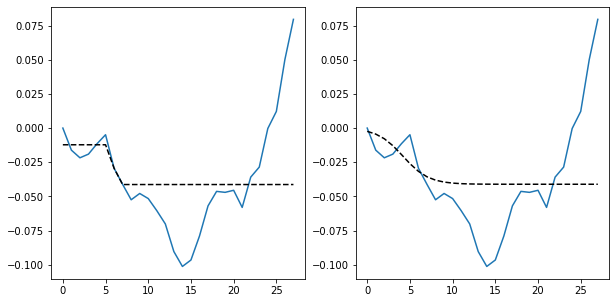

In [88]:
# sigmoid function without lmfit

import scipy.optimize as opt

def sigmoid(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

plt.figure(1,figsize = (10,5))
roi = 10

y = meanTimecourse_yes[roi-1,:]
x = np.arange(y.shape[0])
plt.subplot(121)
plt.plot(x, y)
(a_, b_, c_, d_), _ = opt.curve_fit(sigmoid, x, y)
y_fit = sigmoid(x, a_, b_, c_, d_)
plt.plot(x, y_fit, 'k--')

# residual sum of squares
ss_res = np.sum((y - y_fit) ** 2)

# total sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)

# r-squared
r2 = 1 - (ss_res / ss_tot)
print(r2)


def logistic_function(x, A, c, s):
    return A*(1 - (1/ (1+np.exp((x-c)/s)) ))

#roi = 0

#y = meanTimecourse_yes[roi-1,:]
#x = np.arange(y.shape[0])
plt.subplot(1,2,2)
plt.plot(x, y)
(A_, c_, s_), _ = opt.curve_fit(logistic_function, x, y)
y_fit2 = logistic_function(x, A_, c_, s_)
plt.plot(x, y_fit2, 'k--')

# residual sum of squares
ss_res2 = np.sum((y - y_fit2) ** 2)

# total sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)

# r-squared
r2 = 1 - (ss_res2 / ss_tot)
print(r2)

0 out of  41 nodes
[ 6.1759064  14.93815945  6.13953652  0.        ] [2.43148273e-07 3.48231811e-18 2.73916899e-07 0.00000000e+00]


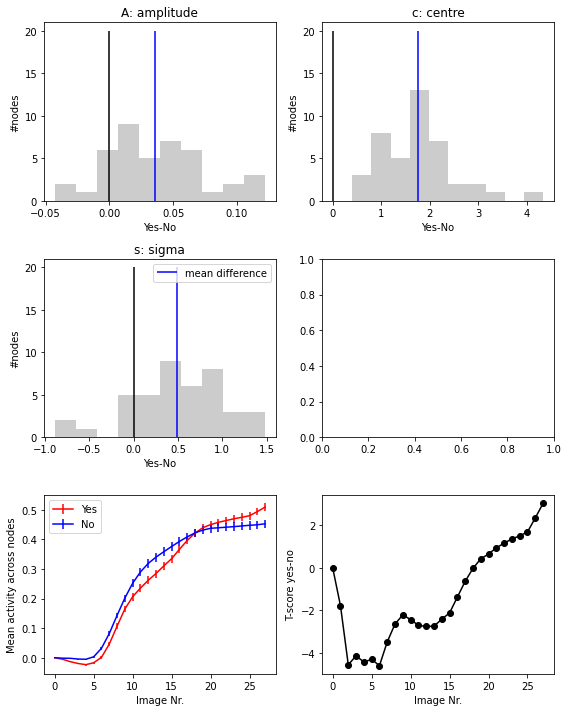

In [104]:
# Fitting a 3-parameter logistic function to our data in the sigmoid cluster
nodes_subset = np.where(labels==1)[0]

#fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (20,15))
A_yes = np.zeros((len(nodes_subset)))
c_yes = np.zeros_like(A_yes)
s_yes = np.zeros_like(A_yes)

A_no = np.zeros_like(A_yes)
c_no = np.zeros_like(A_yes)
s_no = np.zeros_like(A_yes)

unfit = 0
for i,node in enumerate(nodes_subset):
    row = int(np.floor(i/ncols))
    col = int(np.floor(i%ncols))
    #node = nodes[0]
    #plt.subplot(nrows,ncols,i+1)
    yyes = meanTimecourse_yes[node,:]
    yno = meanTimecourse_no[node,:]
    x = np.arange(len(yyes))

    try:
    #print(i)   
        (A_yes[i], c_yes[i], s_yes[i]), _ = opt.curve_fit(logistic_function, x, yyes)
        (A_no[i], c_no[i], s_no[i]), _ = opt.curve_fit(logistic_function, x, yno)
    except:
        #print("does not fit")
        unfit += 1
print(unfit,'out of ',i,'nodes')


nrows = 3
ncols = 2
xwidth = 8
yheight = 10
fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))

t,p = np.zeros((4,)),np.zeros((4,))
ax[0,0].hist(A_yes-A_no, color = 'grey', alpha = .4)
ax[0,0].set_title("A: amplitude")
t[0],p[0] = stats.ttest_1samp(A_yes-A_no,0)
ax[0,0].vlines(np.mean(A_yes-A_no),0,20,'b', ls = 'solid')

ax[0,1].hist(c_yes-c_no, color = 'grey', alpha = .4)
ax[0,1].set_title("c: centre")
t[1],p[1] = stats.ttest_1samp(c_yes-c_no,0)
ax[0,1].vlines(np.mean(c_yes-c_no),0,20,'b', ls = 'solid')

ax[1,0].hist(s_yes-s_no, color = 'grey', alpha = .4)
ax[1,0].set_title("s: sigma")
t[2],p[2] = stats.ttest_1samp(s_yes-s_no,0)
ax[1,0].vlines(np.mean(s_yes-s_no),0,20,'b', ls = 'solid', label = 'mean difference')
ax[1,0].legend()

print(t,p)

for i in range(3):
    r = int(np.floor(i/2))
    c = int(i%2)
    ax[r,c].vlines(0,0,20,'k')
    ax[r,c].set_xlabel('Yes-No')
    ax[r,c].set_ylabel('#nodes')
    plt.axis('square')
    
ax[2,0].errorbar(range(meanTimecourse_yes[nodes_subset,:].shape[1]), np.mean(meanTimecourse_yes[nodes_subset,:],axis=0), stats.sem(meanTimecourse_yes[nodes_subset,:],axis=0), color = 'r', label = 'Yes')
ax[2,0].errorbar(range(meanTimecourse_no[nodes_subset,:].shape[1]), np.mean(meanTimecourse_no[nodes_subset,:],axis=0), stats.sem(meanTimecourse_no[nodes_subset,:],axis=0), color = 'b', label = 'No')
ax[2,0].set_ylabel('Mean activity across nodes')
ax[2,0].set_xlabel('Image Nr.')
ax[2,0].legend()

tscore,pval = np.zeros((meanTimecourse_yes.shape[1],)),np.zeros((meanTimecourse_yes.shape[1],))
for i in np.arange(1,meanTimecourse_yes.shape[1]):
    tscore[i], pval[i] = stats.ttest_ind(meanTimecourse_yes[nodes_subset,i],meanTimecourse_no[nodes_subset,i])
#print(len(range(meanTimecourse_yes.shape[1]))
plt.subplot(3,2,6)
plt.plot(range(meanTimecourse_yes.shape[1]), tscore, color = 'k', marker = 'o')
plt.ylabel('T-score yes-no')
plt.xlabel('Image Nr.')
#ax[2,1].set_xlim(0,28)
#ax[2,1].set_ylim(-3,3)

plt.tight_layout()

/Users/f0053cz/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-90-e944ece862b6>:5: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


0 out of  41 nodes
[-0.18197216  0.14532018 -2.85014119 -1.1200794 ] [0.8565013  0.88517016 0.00680868 0.26919852]


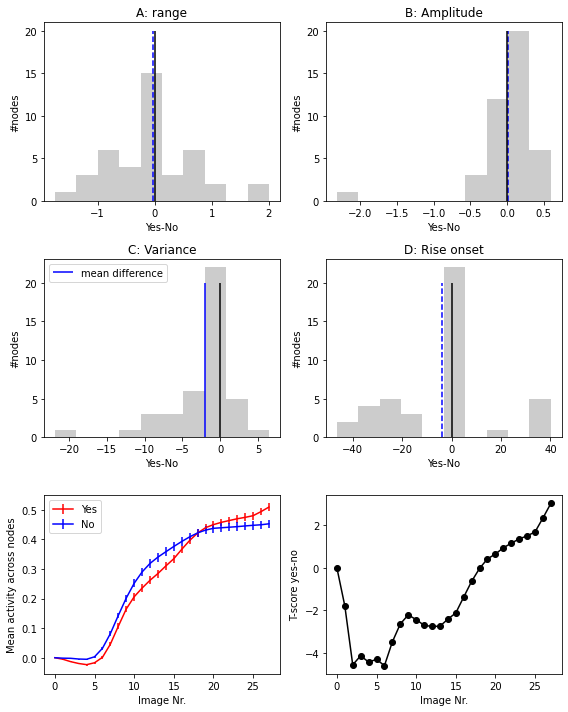

In [105]:
# okay, so logistic regression fits the data reasonably well for cluster 1. 
# Next, we also try the 4-parameter sigmoid function for cluster 1, but the interpretations
# are a bit confusing to me

nodes_subset = np.where(labels==1)[0]

#fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (20,15))
a_yes = np.zeros((len(nodes_subset)))
b_yes = np.zeros_like(a_yes)
c_yes = np.zeros_like(a_yes)
d_yes = np.zeros_like(a_yes)

a_no = np.zeros_like(a_yes)
b_no = np.zeros_like(a_yes)
c_no = np.zeros_like(a_yes)
d_no = np.zeros_like(a_yes)

unfit = 0
for i,node in enumerate(nodes_subset):
    row = int(np.floor(i/ncols))
    col = int(np.floor(i%ncols))
    #node = nodes[0]
    #plt.subplot(nrows,ncols,i+1)
    yyes = meanTimecourse_yes[node,:]
    yno = meanTimecourse_no[node,:]
    x = np.arange(len(yyes))

    try:
        #print(i)   
        (a_yes[i], b_yes[i], c_yes[i], d_yes[i]), _ = opt.curve_fit(sigmoid, x, yyes)
        (a_no[i], b_no[i], c_no[i], d_no[i]), _ = opt.curve_fit(sigmoid, x, yno)
    except:
        #print("does not fit")
        unfit += 1
print(unfit,'out of ',i,'nodes')


nrows = 3
ncols = 2
xwidth = 8
yheight = 10
fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))

t,p = np.zeros((4,)),np.zeros((4,))
ax[0,0].hist(a_yes-a_no, color = 'grey', alpha = .4)
ax[0,0].set_title("A: range")
t[0],p[0] = stats.ttest_1samp(a_yes-a_no,0)
ax[0,0].vlines(np.mean(a_yes-a_no),0,20,'b', ls = 'dashed')

ax[0,1].hist(b_yes-b_no, color = 'grey', alpha = .4)
ax[0,1].set_title("B: Amplitude")
t[1],p[1] = stats.ttest_1samp(b_yes-b_no,0)
ax[0,1].vlines(np.mean(b_yes-b_no),0,20,'b', ls = 'dashed')

ax[1,0].hist(c_yes-c_no, color = 'grey', alpha = .4)
ax[1,0].set_title("C: Variance")
t[2],p[2] = stats.ttest_1samp(c_yes-c_no,0)
ax[1,0].vlines(np.mean(c_yes-c_no),0,20,'b', ls = 'solid', label = 'mean difference')
ax[1,0].legend()


ax[1,1].hist(d_yes-d_no, color = 'grey', alpha = .4)
ax[1,1].set_title("D: Rise onset")
t[3],p[3] = stats.ttest_1samp(d_yes-d_no,0)
ax[1,1].vlines(np.mean(d_yes-d_no),0,20,'b', ls = 'dashed')

print(t,p)

for i in range(4):
    r = int(np.floor(i/2))
    c = int(i%2)
    ax[r,c].vlines(0,0,20,'k')
    ax[r,c].set_xlabel('Yes-No')
    ax[r,c].set_ylabel('#nodes')
    plt.axis('square')
    
ax[2,0].errorbar(range(meanTimecourse_yes[nodes_subset,:].shape[1]), np.mean(meanTimecourse_yes[nodes_subset,:],axis=0), stats.sem(meanTimecourse_yes[nodes_subset,:],axis=0), color = 'r', label = 'Yes')
ax[2,0].errorbar(range(meanTimecourse_no[nodes_subset,:].shape[1]), np.mean(meanTimecourse_no[nodes_subset,:],axis=0), stats.sem(meanTimecourse_no[nodes_subset,:],axis=0), color = 'b', label = 'No')
ax[2,0].set_ylabel('Mean activity across nodes')
ax[2,0].set_xlabel('Image Nr.')
ax[2,0].legend()

tscore,pval = np.zeros((meanTimecourse_yes.shape[1],)),np.zeros((meanTimecourse_yes.shape[1],))
for i in np.arange(1,meanTimecourse_yes.shape[1]):
    tscore[i], pval[i] = stats.ttest_ind(meanTimecourse_yes[nodes_subset,i],meanTimecourse_no[nodes_subset,i])
#print(len(range(meanTimecourse_yes.shape[1]))
plt.subplot(3,2,6)
plt.plot(range(meanTimecourse_yes.shape[1]), tscore, color = 'k', marker = 'o')
plt.ylabel('T-score yes-no')
plt.xlabel('Image Nr.')
#ax[2,1].set_xlim(0,28)
#ax[2,1].set_ylim(-3,3)


plt.tight_layout()

parameters: odict_keys(['amplitude', 'center', 'sigma', 'slope', 'intercept'])
[[Model]]
    (Model(step, form='logistic') + Model(linear))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 145
    # data points      = 28
    # variables        = 5
    chi-square         = 0.02117706
    reduced chi-square = 9.2074e-04
    Akaike info crit   = -191.237154
    Bayesian info crit = -184.576131
[[Variables]]
    amplitude:  0.41982408 +/- 0.08595186 (20.47%) (init = 1)
    center:     10.3087257 +/- 0.35844899 (3.48%) (init = 8)
    sigma:      1.97460509 +/- 0.50931006 (25.79%) (init = 1)
    slope:      0.00783366 +/- 0.00360963 (46.08%) (init = 1)
    intercept: -0.06465445 +/- 0.01573327 (24.33%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, slope)     = -0.972
    C(amplitude, sigma)     =  0.876
    C(sigma, slope)         = -0.802
    C(center, intercept)    =  0.523
    C(sigma, intercept)     = -0.403
    C(center, s

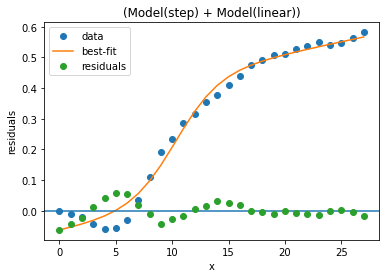

In [106]:
from lmfit.models import StepModel, RectangleModel, LinearModel

roi = 206
form = 'logistic'

y = meanTimecourse_yes[roi-1,:]
x = np.arange(y.shape[0])

model = StepModel(form=form) + LinearModel()
params = model.make_params(center=np.argmax(np.diff(y)), intercept=y[0]) 
# center is the timepoint where y changes the most

print('parameters:',params.keys())

result = model.fit(y, params, x=x)
result.plot_fit()
result.plot_residuals()

print(result.fit_report())